In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [12]:
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_istanbul)  
    
map_istanbul

In [13]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [14]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.5834557, -74.1496048.


In [15]:
map_ista = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ista)  
    
map_ista

In [16]:
CLIENT_ID = 'KC5EZNA4YUNH1ODPBXNDRBEOV0YF2THCQI00NMEBFSTYGNUU' # your Foursquare ID
CLIENT_SECRET = 'XO1AU3XWVNBMARY3Y0JPORIBWZDGW33IF3F0ZMSXPUBLBHXM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KC5EZNA4YUNH1ODPBXNDRBEOV0YF2THCQI00NMEBFSTYGNUU
CLIENT_SECRET:XO1AU3XWVNBMARY3Y0JPORIBWZDGW33IF3F0ZMSXPUBLBHXM


In [17]:
manhattan_data.loc[0, 'Neighborhood']

'St. George'

In [18]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of St. George are 40.6449815710044, -74.07935312512797.


In [19]:
# type your answer here
radius = 500 # define radius
LIMIT = 100 # limit of number of venues returned by Foursquare API
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KC5EZNA4YUNH1ODPBXNDRBEOV0YF2THCQI00NMEBFSTYGNUU&client_secret=XO1AU3XWVNBMARY3Y0JPORIBWZDGW33IF3F0ZMSXPUBLBHXM&v=20180605&ll=40.6449815710044,-74.07935312512797&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ef675453382119e98124fa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 40.6494815755044,
    'lng': -74.07343346476772},
   'sw': {'lat': 40.6404815665044, 'lng': -74.08527278548821}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a214841f964a520cd7c1fe3',
       'name': 'Beso',
       'location': {'address': '11 Schuyler St',
        'crossStreet': 'btwn Richmond Terrace & Stuyvesant Pl',
        'lat': 40.64330638739738,
        'lng': 

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Beso,Tapas Restaurant,40.643306,-74.076508
1,A&S Pizzeria,Pizza Place,40.643940,-74.077626
2,Staten Island September 11 Memorial,Monument / Landmark,40.646767,-74.076510
3,Shake Shack,Burger Joint,40.643660,-74.075891
4,Richmond County Bank Ballpark,Baseball Stadium,40.645056,-74.076864


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [26]:
print(manhattan_venues.shape)
manhattan_venues.head()

(834, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
1,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Shake Shack,40.643660,-74.075891,Burger Joint
4,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium


In [27]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,11,11,11,11,11,11
Arden Heights,5,5,5,5,5,5
Arlington,3,3,3,3,3,3
Arrochar,21,21,21,21,21,21
Bay Terrace,13,13,13,13,13,13
Bloomfield,4,4,4,4,4,4
Bulls Head,45,45,45,45,45,45
Butler Manor,6,6,6,6,6,6
Castleton Corners,15,15,15,15,15,15


In [28]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 179 uniques categories.


In [29]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Laundromat,Lawyer,Liquor Store,Locksmith,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Professional & Other Places,Racetrack,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoothie Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Yoga Studio
0,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
manhattan_onehot.shape

(834, 180)

In [31]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Laundromat,Lawyer,Liquor Store,Locksmith,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Professional & Other Places,Racetrack,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoothie Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Yoga Studio
0,Annadale,0.000,0.090909,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.090909,0.000000,0.00000,0.000000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.00,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.00000,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000

In [32]:
manhattan_grouped.shape

(63, 180)

In [33]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
           venue  freq
0    Pizza Place  0.18
1     Restaurant  0.09
2  Train Station  0.09
3   Dance Studio  0.09
4       Pharmacy  0.09


----Arden Heights----
         venue  freq
0   Playground   0.2
1       Lawyer   0.2
2  Coffee Shop   0.2
3     Pharmacy   0.2
4  Pizza Place   0.2


----Arlington----
           venue  freq
0  Deli / Bodega  0.33
1    Coffee Shop  0.33
2     Playground  0.33
3            ATM  0.00
4    Pizza Place  0.00


----Arrochar----
                venue  freq
0       Deli / Bodega  0.10
1            Bus Stop  0.10
2  Italian Restaurant  0.10
3         Supermarket  0.05
4          Food Truck  0.05


----Bay Terrace----
                venue  freq
0  Italian Restaurant  0.15
1         Supermarket  0.15
2       Grocery Store  0.08
3    Sushi Restaurant  0.08
4      Shipping Store  0.08


----Bloomfield----
               venue  freq
0  Recreation Center  0.25
1       Burger Joint  0.25
2           Bus Stop  0.25
3         Theme Park  0.25
4   

               venue  freq
0             Arcade  0.33
1   Sushi Restaurant  0.33
2  Convenience Store  0.33
3                ATM  0.00
4               Pier  0.00


----Willowbrook----
           venue  freq
0    Pizza Place  0.17
1       Bus Stop  0.17
2  Deli / Bodega  0.17
3     Bagel Shop  0.17
4            Spa  0.17


----Woodrow----
                venue  freq
0            Pharmacy  0.12
1      Cosmetics Shop  0.06
2         Pizza Place  0.06
3       Grocery Store  0.06
4  Miscellaneous Shop  0.06




In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Restaurant,Train Station,Dance Studio,Pharmacy,Park,Bar,Diner,Liquor Store,American Restaurant
1,Arden Heights,Playground,Lawyer,Coffee Shop,Pharmacy,Pizza Place,Pier,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall
2,Arlington,Deli / Bodega,Coffee Shop,Playground,ATM,Pizza Place,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant
3,Arrochar,Deli / Bodega,Bus Stop,Italian Restaurant,Supermarket,Food Truck,Nail Salon,Taco Place,Pizza Place,Outdoors & Recreation,Middle Eastern Restaurant
4,Bay Terrace,Italian Restaurant,Supermarket,Grocery Store,Sushi Restaurant,Shipping Store,Insurance Office,Donut Shop,Liquor Store,Home Service,Salon / Barbershop


In [36]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3], dtype=int32)

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,3,Clothing Store,Sporting Goods Shop,Italian Restaurant,American Restaurant,Bar,Baseball Stadium,Outlet Mall,Bus Station,Coffee Shop,Pharmacy
1,Staten Island,New Brighton,40.640615,-74.087017,4,Bus Stop,Deli / Bodega,Park,Playground,Discount Store,Pier,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Peruvian Restaurant
2,Staten Island,Stapleton,40.626928,-74.077902,3,Bus Stop,Coffee Shop,Pizza Place,Sandwich Place,Bank,Bar,Discount Store,Spanish Restaurant,Sri Lankan Restaurant,Park
3,Staten Island,Rosebank,40.615305,-74.069805,3,Grocery Store,Italian Restaurant,Intersection,Ice Cream Shop,Storage Facility,Taco Place,Breakfast Spot,Cajun / Creole Restaurant,Pizza Place,Museum
4,Staten Island,West Brighton,40.631879,-74.107182,3,Coffee Shop,Bar,Breakfast Spot,American Restaurant,Deli / Bodega,Italian Restaurant,Bank,Music Store,Pharmacy,Bus Stop


In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
count_venue = manhattan_merged
count_venue = count_venue.drop(['Neighborhood', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Arcade,Bank,Bar,Beach,Bus Station,Bus Stop,Café,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Deli / Bodega,Diner,Fast Food Restaurant,Grocery Store,Hotel,Italian Restaurant,Liquor Store,Park,Pharmacy,Pizza Place,Playground,Pool,Recreation Center,Rental Car Location,Steakhouse,Theater
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,2,0,2,1,4,1,1,1,1,3,4,1,1,1,1,9,1,0,1,11,2,1,0,1,0,2
4,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


NameError: name 'plt' is not defined

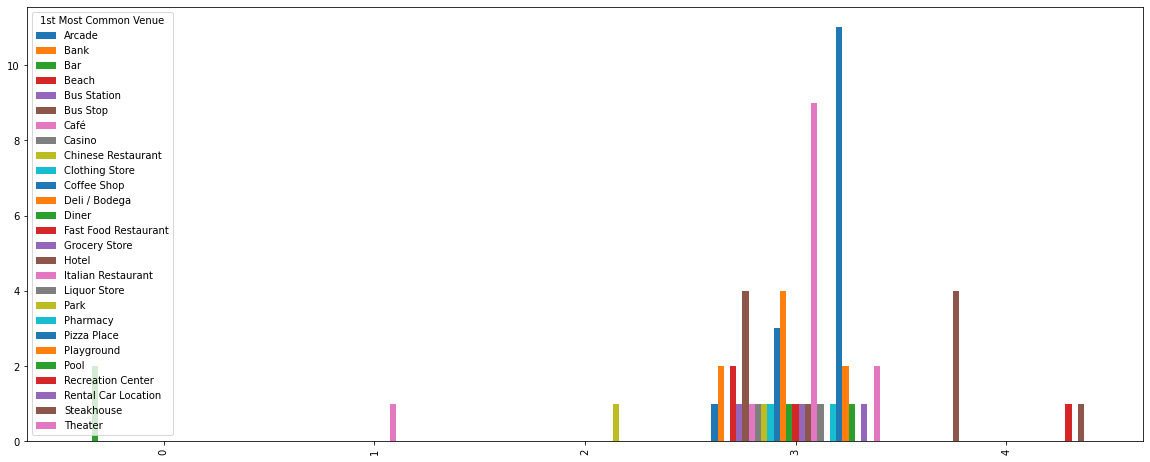

In [42]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [43]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Ivory,Bar,ATM,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant,Pet Store
15,Oakwood,Bar,Bus Station,Lawyer,Nightlife Spot,Pizza Place,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant


In [44]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Howland Hook,Italian Restaurant,Nightclub,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant,Pet Store,Pharmacy


In [45]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Todt Hill,Park,ATM,Rental Car Location,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Peruvian Restaurant,Pet Store


In [46]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Sporting Goods Shop,Italian Restaurant,American Restaurant,Bar,Baseball Stadium,Outlet Mall,Bus Station,Coffee Shop,Pharmacy
2,Stapleton,Bus Stop,Coffee Shop,Pizza Place,Sandwich Place,Bank,Bar,Discount Store,Spanish Restaurant,Sri Lankan Restaurant,Park
3,Rosebank,Grocery Store,Italian Restaurant,Intersection,Ice Cream Shop,Storage Facility,Taco Place,Breakfast Spot,Cajun / Creole Restaurant,Pizza Place,Museum
4,West Brighton,Coffee Shop,Bar,Breakfast Spot,American Restaurant,Deli / Bodega,Italian Restaurant,Bank,Music Store,Pharmacy,Bus Stop
5,Grymes Hill,Deli / Bodega,Dog Run,Gym,ATM,Pier,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant
7,South Beach,Beach,Pier,ATM,Deli / Bodega,Bus Stop,Athletics & Sports,Pizza Place,Outdoors & Recreation,Outlet Mall,Park
8,Port Richmond,Rental Car Location,Pizza Place,Art Gallery,Bus Stop,Park,Martial Arts School,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Peruvian Restaurant
11,Castleton Corners,Pizza Place,Bagel Shop,Ice Cream Shop,Mexican Restaurant,Grocery Store,Bar,Bank,Hardware Store,Tattoo Parlor,Sandwich Place
12,New Springville,Deli / Bodega,Liquor Store,Health & Beauty Service,Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Pharmacy,Chinese Restaurant,Spa
13,Travis,Hotel,Bowling Alley,Gym,Baseball Field,Donut Shop,Sports Club,Deli / Bodega,Park,Home Service,Comedy Club


In [47]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Sporting Goods Shop,Italian Restaurant,American Restaurant,Bar,Baseball Stadium,Outlet Mall,Bus Station,Coffee Shop,Pharmacy
2,Stapleton,Bus Stop,Coffee Shop,Pizza Place,Sandwich Place,Bank,Bar,Discount Store,Spanish Restaurant,Sri Lankan Restaurant,Park
3,Rosebank,Grocery Store,Italian Restaurant,Intersection,Ice Cream Shop,Storage Facility,Taco Place,Breakfast Spot,Cajun / Creole Restaurant,Pizza Place,Museum
4,West Brighton,Coffee Shop,Bar,Breakfast Spot,American Restaurant,Deli / Bodega,Italian Restaurant,Bank,Music Store,Pharmacy,Bus Stop
5,Grymes Hill,Deli / Bodega,Dog Run,Gym,ATM,Pier,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Park,Peruvian Restaurant
7,South Beach,Beach,Pier,ATM,Deli / Bodega,Bus Stop,Athletics & Sports,Pizza Place,Outdoors & Recreation,Outlet Mall,Park
8,Port Richmond,Rental Car Location,Pizza Place,Art Gallery,Bus Stop,Park,Martial Arts School,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Peruvian Restaurant
11,Castleton Corners,Pizza Place,Bagel Shop,Ice Cream Shop,Mexican Restaurant,Grocery Store,Bar,Bank,Hardware Store,Tattoo Parlor,Sandwich Place
12,New Springville,Deli / Bodega,Liquor Store,Health & Beauty Service,Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Pharmacy,Chinese Restaurant,Spa
13,Travis,Hotel,Bowling Alley,Gym,Baseball Field,Donut Shop,Sports Club,Deli / Bodega,Park,Home Service,Comedy Club
